In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from lr4 import r_standard as r, cor, space_middle
import lr3_x as X
import lr3_y as Y

In [36]:
source = pd.read_csv('dataset.csv', header=None)
N = len(source)
source.head()

,0,1
0,405,107.5
1,521,154.9
2,382,98.1
3,362,111.7
4,444,130.0


работаем по схеме

$$ z_x = \frac{x - \bar{x}}{\sigma_x}.$$

In [37]:
normalized = source.copy()
normalized[0] = (normalized[0] - normalized[0].mean()) / normalized[0].std()
normalized[1] = (normalized[1] - normalized[1].mean()) / normalized[1].std()
normalized

,0,1
0,-0.893663,-1.027792
1,1.325225,1.241278
2,-1.333615,-1.477776
3,-1.716182,-0.826735
4,-0.147657,0.049298
...,...,...
109,1.000043,0.781720
110,0.368808,0.714701
111,0.789631,1.222130
112,1.765177,1.806152


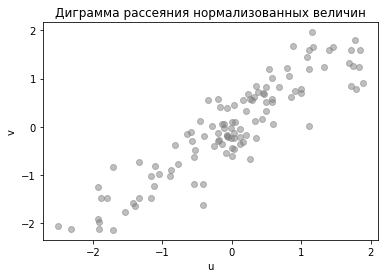

In [38]:
plt.scatter(normalized[0], normalized[1], alpha=0.5, color="gray")
plt.xlabel("u")
plt.ylabel("v")
plt.title("Диграмма рассеяния нормализованных величин")
plt.show()

In [39]:
k = int(np.floor(np.sqrt(N/2)))
centers = normalized.sample(n=k, random_state=2298).reset_index(drop=True)
centers

,0,1
0,0.043626,0.101956
1,-1.716182,-0.826735
2,1.688664,1.327445
3,-0.109401,-0.027295
4,-0.166786,0.403541
5,0.330551,0.121104
6,1.172198,1.657753


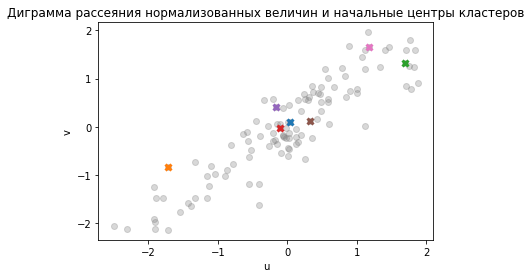

In [40]:
plt.scatter(normalized[0], normalized[1], alpha=0.3, color="gray")
for i in range(k):
    plt.plot(centers.iloc[i, 0], centers.iloc[i, 1], marker="x", mew=3, ms=6)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Диграмма рассеяния нормализованных величин и начальные центры кластеров")
plt.show()

In [41]:
def find_cluster_index(_point, _centers):
    return np.argmin(np.linalg.norm(_point - _centers, axis=1))

In [50]:
def calculate_centers(_centers, _clusters):
    _centers = _centers.copy()
    for i in range(len(_clusters)):
        if len(_clusters[i]) > 0:
            _centers.loc[i, :] = np.mean(_clusters[i], axis=0)
    return _centers

def make_clusters(_data, _centers, _mode='after_each'):
    _clusters = [[] for _ in range(len(_centers))]
    for i in range(len(_data)):
        _clust_ind = find_cluster_index(_data.loc[i, :], _centers)
        _clusters[_clust_ind].append(list(_data.loc[i, :]))
        if _mode == 'after_each':
            _centers = calculate_centers(_centers, _clusters)
    if _mode == 'after_all':
        _centers = calculate_centers(_centers, _clusters)
    return _clusters, _centers

def f1(_clusters, _centers):
    _sum = 0
    for i in range(len(_clusters)):
        _sum += np.sum((np.array(_clusters[i]) - np.array(_centers.loc[i, :]))**2)
    return _sum

def f2(_clusters):
    _sum = 0
    for i in range(len(_clusters)):
        for j in range(len(_clusters[i])):
            for k in range(j+1, len(_clusters[i])):
                _sum += np.linalg.norm(np.array(_clusters[i][j]) - np.array(_clusters[i][k]))
    return _sum

def f3(_clusters, _centers):
    _sum = 0
    for i in range(len(_clusters)):
        _sum += np.sum((np.array(_clusters[i]) - np.array(_centers.loc[i, :]))**2) / len(_clusters[i])
    return _sum

def draw_clusters(_clusters, _centers, _index):
    for i in range(len(_clusters)):
        plt.scatter(np.array(_clusters[i])[:, 0], np.array(_clusters[i])[:, 1], alpha=0.5)
        plt.plot(_centers.loc[i, 0], _centers.loc[i, 1], marker="x", mew=3, ms=6)
    plt.xlabel("u")
    plt.ylabel("v")
    plt.title("Разбиение на кластеры - итерация " + str(_index))
    plt.show()

Итерация  1
F1: 19.393306676626427, F2: 535.0259554066845, F3: 1.1940458236227163


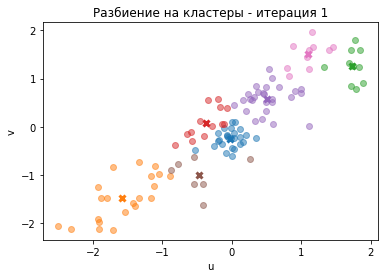

Итерация  2
F1: 15.224404173149178, F2: 446.29854197798693, F3: 0.9675215872510854


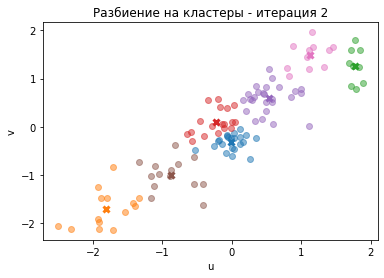

In [51]:
centers1 = centers.copy()
clusters1 = None
next_clusters1, centers1 = make_clusters(normalized, centers1, 'after_each')
counter1 = 1
while (clusters1 != next_clusters1):
    clusters1 = next_clusters1.copy()
    print("Итерация ", counter1)
    print('F1: {}, F2: {}, F3: {}'.format(
        f1(next_clusters1, centers1), 
        f2(next_clusters1),
        f3(next_clusters1, centers1)))
    draw_clusters(next_clusters1, centers1, counter1)
    next_clusters1, centers1 = make_clusters(normalized, centers1, 'after_each')
    counter1 += 1

Итерация  1
F1: 23.7033305084117, F2: 675.2771600395128, F3: 1.1761297669007267


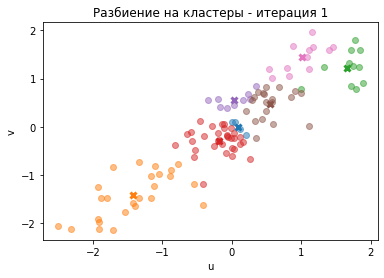

Итерация  2
F1: 21.232130254221598, F2: 571.1797166921232, F3: 1.0908119936491505


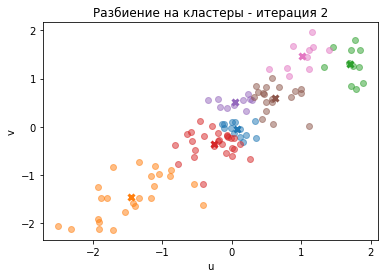

Итерация  3
F1: 20.40281719182281, F2: 517.4760858619246, F3: 1.110276713699098


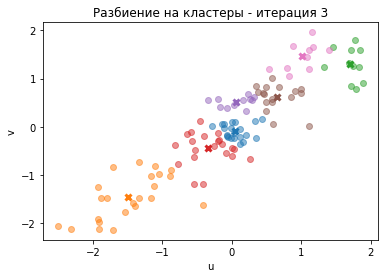

Итерация  4
F1: 19.9064949555773, F2: 507.7614462416363, F3: 1.1137733710851783


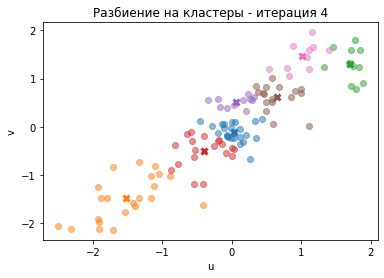

Итерация  5
F1: 18.72063427958748, F2: 489.9955296177793, F3: 1.1061093851714259


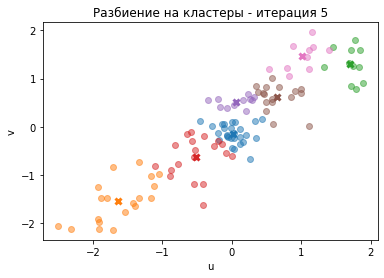

Итерация  6
F1: 16.93317071284603, F2: 475.6917448128395, F3: 1.0583422339065112


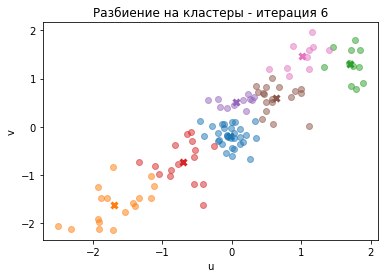

Итерация  7
F1: 15.770898625110433, F2: 476.7659677939061, F3: 1.0021721685887917


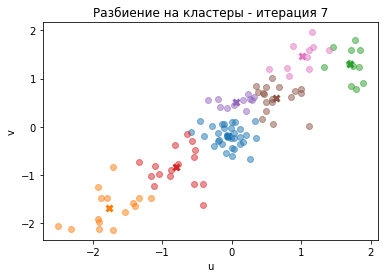

Итерация  8
F1: 15.344529151175895, F2: 480.27571379652784, F3: 0.9848180648039133


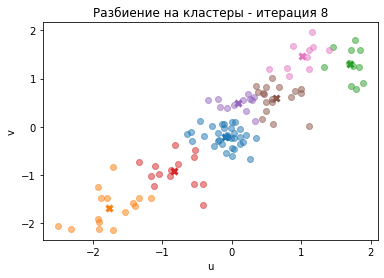

Итерация  9
F1: 15.256405642454517, F2: 487.4228601423251, F3: 0.9833061131093985


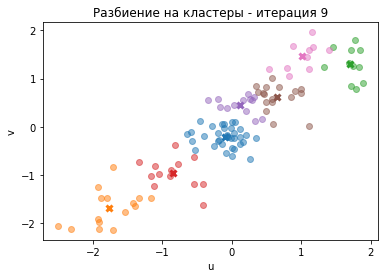

Итерация  10
F1: 15.155278326180667, F2: 485.79302969565157, F3: 0.9816883548460924


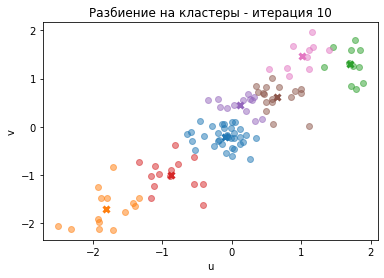

Итерация  11
F1: 15.01298445250833, F2: 485.5962468662807, F3: 0.9696943163285154


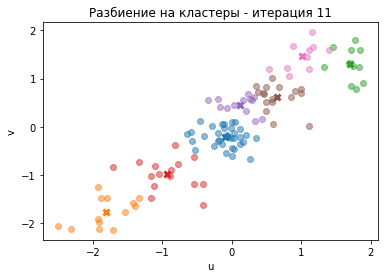

In [52]:
centers2 = centers.copy()
clusters2 = None
next_clusters2, centers2 = make_clusters(normalized, centers2, 'after_all')
counter2 = 1
while (clusters2 != next_clusters2):
    clusters2 = next_clusters2.copy()
    print("Итерация ", counter2)
    print('F1: {}, F2: {}, F3: {}'.format(
        f1(next_clusters2, centers2), 
        f2(next_clusters2),
        f3(next_clusters2, centers2)))
    draw_clusters(next_clusters2, centers2, counter2)
    next_clusters2, centers2 = make_clusters(normalized, centers2, 'after_all')
    counter2 += 1